In [1]:
from google.colab import files
uploaded = files.upload()


Saving Students Performance in Exams.zip to Students Performance in Exams.zip


In [2]:
import zipfile

zip_path = "Students Performance in Exams.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(".")


1. Load the dataset:Load the CSV file and preview the first 5 rows of the dataset

In [3]:
import pandas as pd

df = pd.read_csv("StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.isnull().sum()


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


2. Create a column for average score: Add a new column representing the average score across math, reading, and writing

In [7]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)


3. One-hot encode categorical features and define input/output:
  .Convert categorical variables into numeric using one-hot encoding

 .Define X (features) and y (target)

In [8]:
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop(['math score', 'average_score'], axis=1)
y = df_encoded['math score']

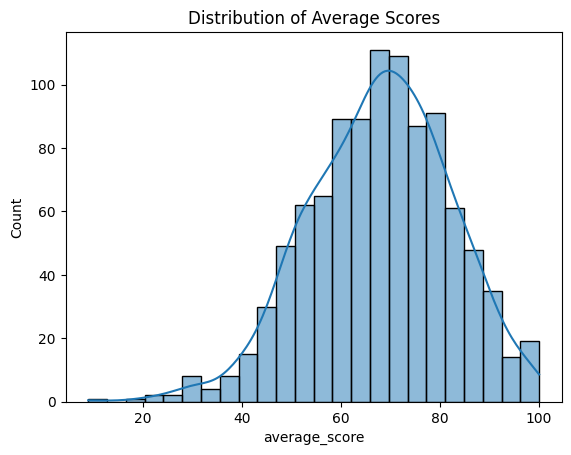

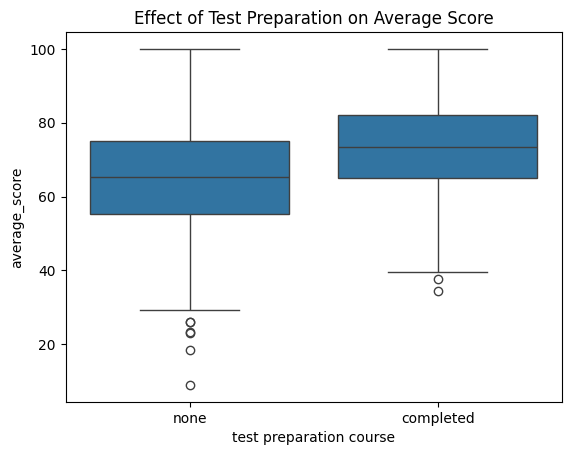

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['average_score'], kde=True)
plt.title("Distribution of Average Scores")
plt.show()
sns.boxplot(x='test preparation course', y='average_score', data=df)
plt.title("Effect of Test Preparation on Average Score")
plt.show()

4. Split the data into training and testing sets:
 Splits the dataset into 80% training and 20% testing sets.



In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. Train a Linear Regression model: Initializes and trains a linear regression model on the training data



In [11]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

6. Make predictions on test data: Uses the trained model to predict math scores on the test set


In [12]:
y_pred = linear_model.predict(X_test)


7.MAE Calculation for Linear Regression:
Calculates the Mean Absolute Error (MAE) to evaluate how close the linear regression model’s predictions are to the actual *values*

In [13]:
from sklearn.metrics import mean_absolute_error

y_pred = linear_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)


MAE: 4.214763142474851


8.Evaluate the model performance:Calculates and prints the Mean Squared Error and R² score to evaluate how well the model performs

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

MSE: 29.095169866715487
R^2 Score: 0.8804332983749565


9. Plot actual vs predicted scores :Visualizes the relationship between actual and predicted math scores

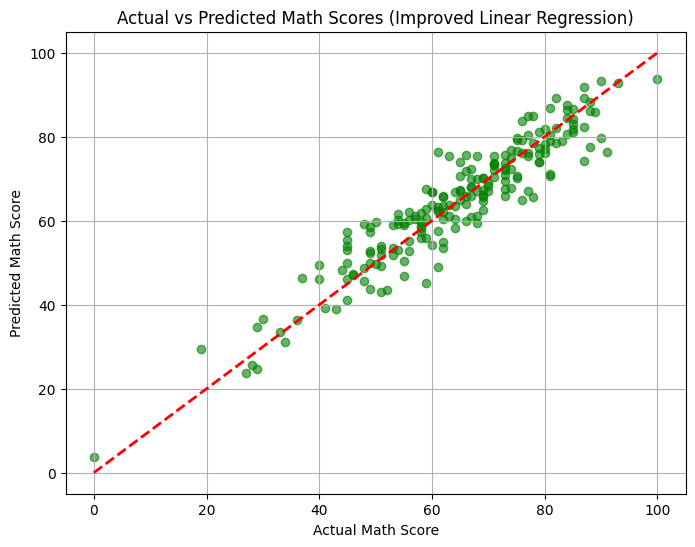

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Actual vs Predicted Math Scores (Improved Linear Regression)')
plt.grid(True)
plt.show()

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

10. Polynomial Regression Model Fitting : This cell creates and trains a polynomial regression model using a pipeline. It first expands the features into polynomial features of degree 2, then applies a linear regression model on the transformed features

In [17]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [18]:
y_poly_pred = poly_model.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

print("Polynomial Regression Results:")
print("MSE:", mean_squared_error(y_test, y_poly_pred))
print("R^2 Score:", r2_score(y_test, y_poly_pred))


Polynomial Regression Results:
MSE: 32.79981180138131
R^2 Score: 0.8652090594769206


In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

results = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial Regression"],
    "MSE": [
        mean_squared_error(y_test, y_pred_linear),
        mean_squared_error(y_test, y_pred_poly)
    ],
    "R² Score": [
        r2_score(y_test, y_pred_linear),
        r2_score(y_test, y_pred_poly)
    ]
})

print(results)


                   Model        MSE  R² Score
0      Linear Regression  29.095170  0.880433
1  Polynomial Regression  32.799812  0.865209


11.Model Evaluation with MAE and Residual Plots:
This section compares the linear and polynomial regression models using Mean Absolute Error (MAE). It also visualizes the residuals (differences between actual and predicted values) to assess model fit and bias patterns.



MAE Linear Regression: 4.214763142474851
MAE Polynomial Regression: 4.543567379112505


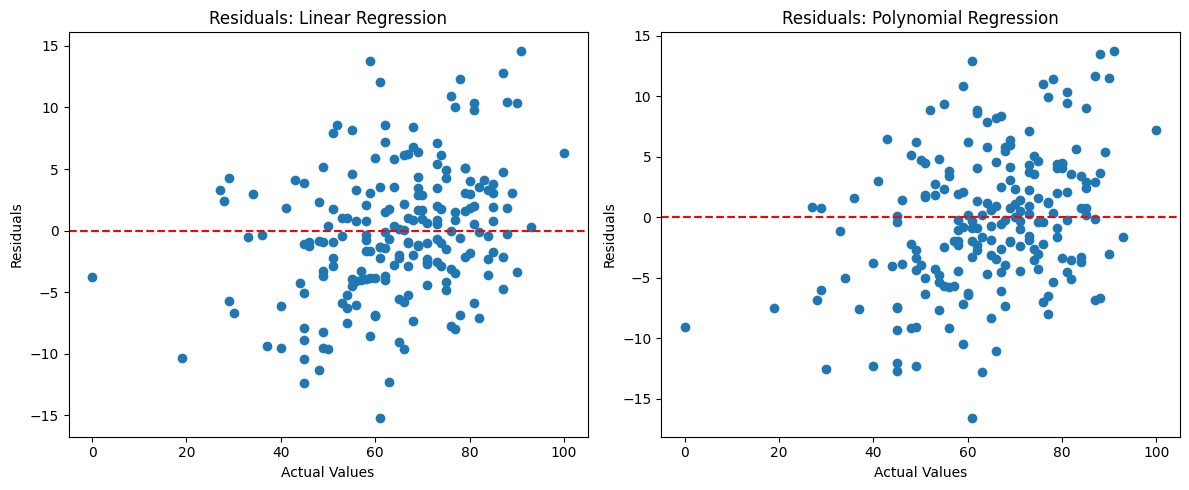

In [21]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_poly = mean_absolute_error(y_test, y_pred_poly)

print(f"MAE Linear Regression: {mae_linear}")
print(f"MAE Polynomial Regression: {mae_poly}")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_test, y_test - y_pred_linear)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals: Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

plt.subplot(1,2,2)
plt.scatter(y_test, y_test - y_pred_poly)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals: Polynomial Regression')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


12.Polynomial Regression: Actual vs. Predicted Plot
This plot compares the predicted math scores from the polynomial regression model with the actual scores.
The closer the points are to the red dashed line, the more accurate the predictions


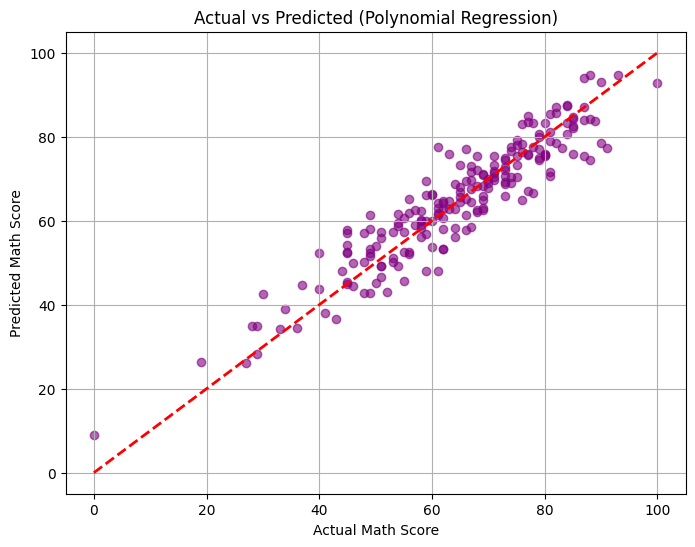

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_poly_pred, color='purple', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Actual vs Predicted (Polynomial Regression)')
plt.grid(True)
plt.show()

In [23]:
import joblib
joblib.dump(linear_model, 'linear_model.joblib')
loaded_model = joblib.load('linear_model.joblib')